Based upon: https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',')
df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="any", inplace=True) #drop missing (not available) data

In [3]:
df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
X = df.iloc[:, :4].to_numpy()
Y = df.iloc[:, 4].to_numpy()

###### X is of shape (150, 4).

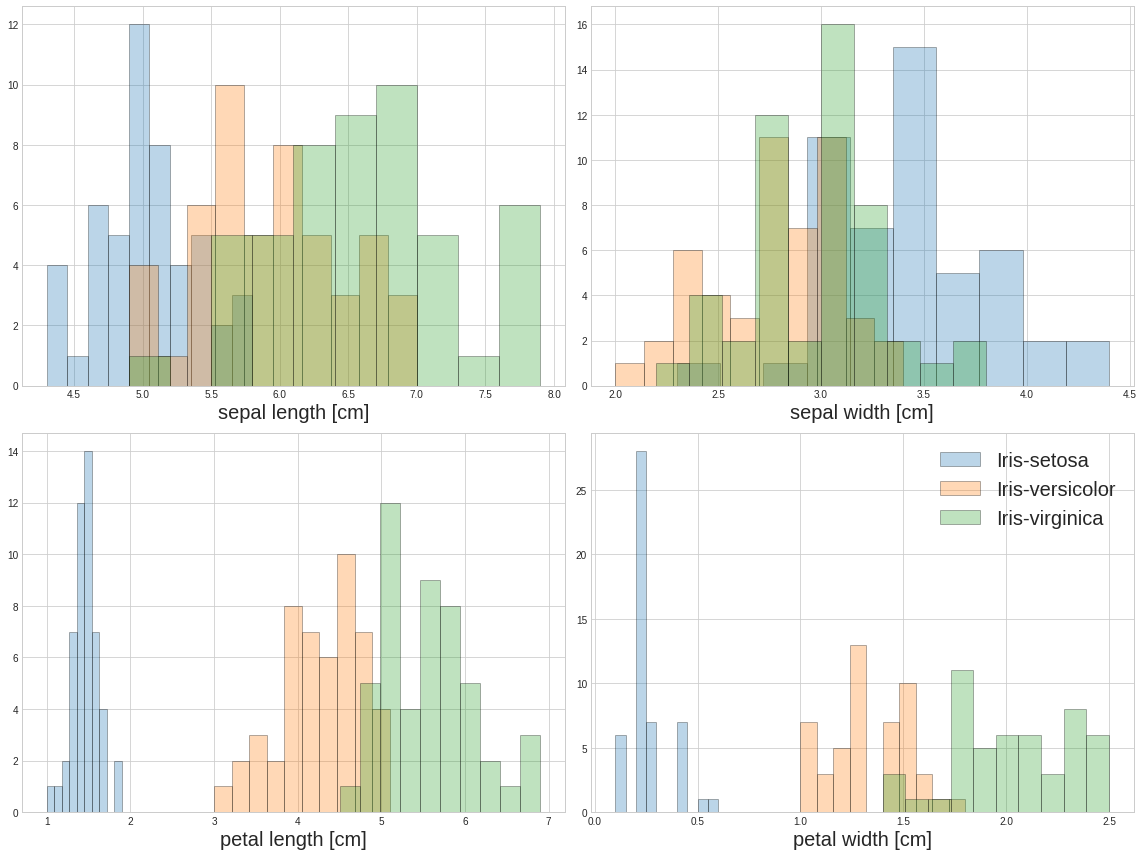

In [5]:
label_dict = {1: "Iris-setosa",
              2: "Iris-versicolor",
              3: "Iris-virginica"}

feature_dict = {0: 'sepal length [cm]',
                1: 'sepal width [cm]',
                2: 'petal length [cm]',
                3: 'petal width [cm]'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(16, 12))
    for cnt in range(4):
        plt.subplot(2, 2, cnt+1)
        for lab in label_dict.values():
            plt.hist(X[Y==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=0.3,
                     ec='black')
        plt.xlabel(feature_dict[cnt], fontsize=20)
    plt.legend(loc='upper right', fancybox=True, fontsize=20)

    plt.tight_layout()
    plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
X_std = StandardScaler().fit_transform(X) #standarize data

In [8]:
np.mean(X_std, axis=0) #feature means are practically 0

array([-4.73695157e-16, -6.63173220e-16,  3.31586610e-16, -2.84217094e-16])

In [9]:
np.std(X_std, axis=0) #feature std devs are 1

array([1., 1., 1., 1.])

In [10]:
N = X_std.shape[0] #number of specimen

In [11]:
Cov = X_std.T @ X_std / (N-1) #covariance matrix

In [12]:
print("Covariance matrix\n{}".format(Cov))

Covariance matrix
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [13]:
evals, evecs = np.linalg.eig(Cov)

In [14]:
print("Eigenvalues\n{}".format(evals))

Eigenvalues
[2.93035378 0.92740362 0.14834223 0.02074601]


In [15]:
print("Corresponding eigenvectors columnwise\n{}".format(evecs))

Corresponding eigenvectors columnwise
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


###### Find the largest eigenvalues and corresponding eigenvectors (as `np.linalg.eig()` gives no guaranteed evals order.

In [16]:
eig_pairs = [(np.abs(evals[i]), evecs[:,i]) for i in range(len(evals))] #list of tuples
eig_pairs.sort(key=lambda x: x[0], reverse=True)

###### Determine explained variance.

In [17]:
total = np.sum(evals)
var_exp = [(i/total)*100 for i in sorted(evals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

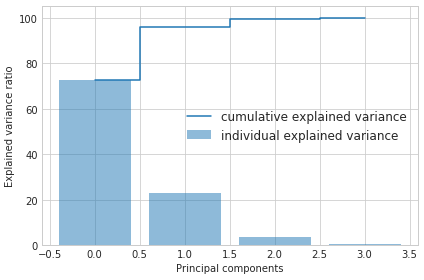

In [18]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best', fontsize=12)
    plt.tight_layout()

###### First two principal components are sufficient to project the data by means of the corresponding eigenvectors.

In [19]:
PROJ_MTRX = np.hstack((eig_pairs[0][1].reshape(4,1),
                     eig_pairs[1][1].reshape(4,1)))

In [20]:
print("Projection matrix \n{}".format(PROJ_MTRX))

Projection matrix 
[[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [21]:
X_PROJ = X_std @ PROJ_MTRX #data projection

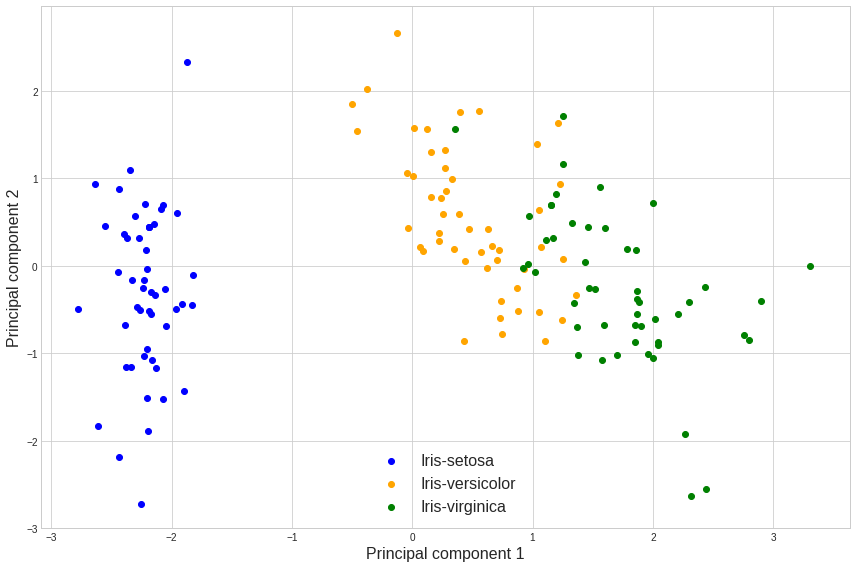

In [22]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12,8))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'orange', 'green')):
        plt.scatter(X_PROJ[Y==lab, 0],
                   X_PROJ[Y==lab, 1],
                   label=lab,
                   c=col)
    plt.xlabel('Principal component 1', fontsize=16)
    plt.ylabel('Principal component 2', fontsize=16)
    plt.legend(loc='lower center', fontsize=16)
    plt.tight_layout()
    plt.show()